In [ ]:
# Standard libraries
import pandas as pd
import numpy as np
import pickle

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.core.display import display, HTML
sns.set()
%matplotlib inline

# Sklearn-preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.utils import class_weight
#from category_encoders import TargetEncoder


# Machine Learning Algorithms
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, IsolationForest,
                              RandomForestRegressor, AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier)
from sklearn.linear_model import Perceptron


# Performance metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the Drive to Google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
planets_c = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Planet_data.csv", index_col='rowid')

In [ ]:
planets_c.info()

In [ ]:
y = planets_c.loc[:, 'habitable'] 

y.value_counts()

False    113
True       4
Name: habitable, dtype: int64

In [ ]:
# Basic validation: splitting the data 60 - 20 - 20 train/val/test
X_train, X_test, y_train, y_test = train_test_split(planets_c.iloc[:, :-1], planets_c.loc[:, 'habitable'], test_size=0.25,random_state=76)
X_train.shape 
# shape of my train set

(87, 56)

Anomaly Detection

In [ ]:
y_train.head()

rowid
814     False
3957    False
444     False
2902     True
1241    False
Name: habitable, dtype: bool

In [ ]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, contamination=0.1, random_state=42)
clf.fit(X_train)
# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
y_pred_train
np.place(y_pred_train, y_pred_train>0, [0])
np.place(y_pred_train, y_pred_train<0, [1])

array([ 1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1])

In [ ]:
y_pred_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
#To convert '-1' values to 1 as they are the anomaly or poisitive class
#convert '1' values to 0 since they are the negative class
np.place(y_pred_test, y_pred_test>0, [0])
np.place(y_pred_test, y_pred_test<0, [1])
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test

Text(0.5, 1.0, 'Confusion Matrix of Anomaly Detection')

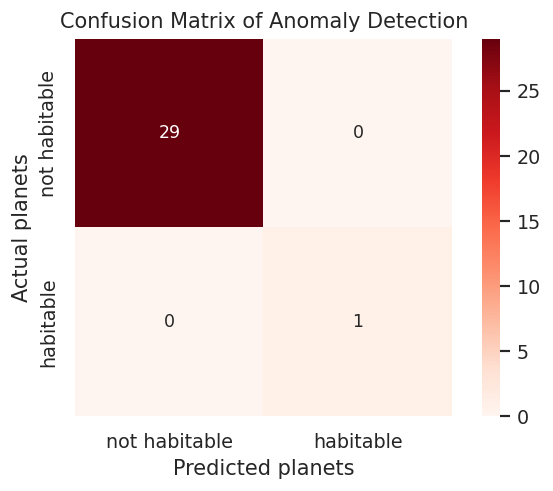

In [ ]:
conf = confusion_matrix(y_test, y_pred_test)

def conf_matrix(x):
    plt.figure(dpi=125)
    sns.heatmap(x, cmap=plt.cm.Reds, annot=True, square=True,fmt='d',
               xticklabels=['not habitable', 'habitable'],
               yticklabels=['not habitable', 'habitable'])

    plt.xlabel('Predicted planets')
    plt.ylabel('Actual planets')
conf_matrix(conf)
plt.title('Confusion Matrix of Anomaly Detection')

In [ ]:
X_train

SMOTE

In [ ]:
X_smoted, y_smoted = SMOTE( sampling_strategy='minority',k_neighbors=2, random_state=76).fit_resample(X_train, y_train)

In [ ]:
X_smoted.shape

(168, 56)

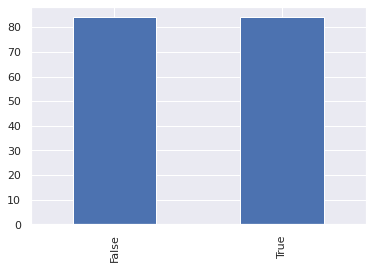

In [ ]:
pd.Series(y_smoted).value_counts().plot.bar()

In [ ]:
# list to contain model and accuracy values
eva_list = []
# to contain model names
models = []

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_smoted, y_smoted)
y_pred = knn.predict(X_test)

knn_acc = round(knn.score(X_smoted, y_smoted) * 100, 2)
knn_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Train Accuracy of KNN: % {knn_acc}')
print(f'Test Accuracy of KNN: % {knn_acc_test}')

# Get precision, recall, and f1
precision, recall, f1, support = score(y_test, y_pred, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

Train Accuracy of KNN: % 99.4
Test Accuracy of KNN: % 100.0
Precision : 1.0
Recall : 1.0
F1-score : 1.0


Text(0.5, 1.0, 'Confusion Matrix of KNN after applying SMOTE')

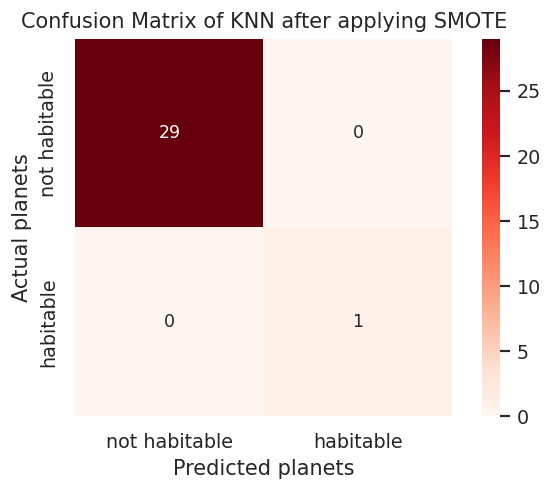

In [ ]:
conf_knn = confusion_matrix(y_test, y_pred)

def conf_matrix(x):
    plt.figure(dpi=125)
    sns.heatmap(x, cmap=plt.cm.Reds, annot=True, square=True,fmt='d',
               xticklabels=['not habitable', 'habitable'],
               yticklabels=['not habitable', 'habitable'])

    plt.xlabel('Predicted planets')
    plt.ylabel('Actual planets')

conf_matrix(conf_knn)
plt.title('Confusion Matrix of KNN after applying SMOTE')